## Comparison of HADES fiducial $B(k)$ for different halo mass limit $M_{\rm h, min}$

In [1]:
import os
import h5py
import numpy as np 
# --- emanu ---
from emanu import util as UT

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def hadesBk_Mhmin(mhmin): 
    dir_bk = os.path.join(UT.dat_dir(), 'bispectrum', 'hades')
    
    fbk = lambda i, mh: 'groups.0.0eV.%i.nzbin4.mhmin%.1f.zspace.Ngrid360.Nmax40.Ncut3.step3.pyfftw.dat' % (i, mh)
    for ireal in range(1, 11): 
        fbk_i = fbk(ireal, mhmin)
        k1, k2, k3, _p0k1, _p0k2, _p0k3, _bk, _bk_sn = np.loadtxt(os.path.join(dir_bk, fbk_i), 
                                                                  skiprows=1, unpack=True, usecols=[0,1,2,3,4,5,6,8])
        if ireal == 1: 
            p0k1 = np.zeros_like(_p0k1)
            p0k2 = np.zeros_like(_p0k1)
            p0k3 = np.zeros_like(_p0k1)
            bk = np.zeros_like(_bk)
            bk_sn = np.zeros_like(_bk_sn)
        p0k1 += _p0k1
        p0k2 += _p0k2        
        p0k3 += _p0k3
        bk += _bk
        bk_sn += bk_sn 
    p0k1 /= 10.
    p0k2 /= 10.
    p0k3 /= 10.
    bk /= 10.
    bk_sn /= 10.
    return k1, k2, k3, p0k1, p0k2, p0k3, bk, bk_sn

In [4]:
bk_fid = hadesBk_Mhmin(3200.)
bk_m_p = hadesBk_Mhmin(3300.)
bk_m_pp = hadesBk_Mhmin(3400.)
bk_m_ppp = hadesBk_Mhmin(3500.)

In [5]:
kf = 2.*np.pi/1000.

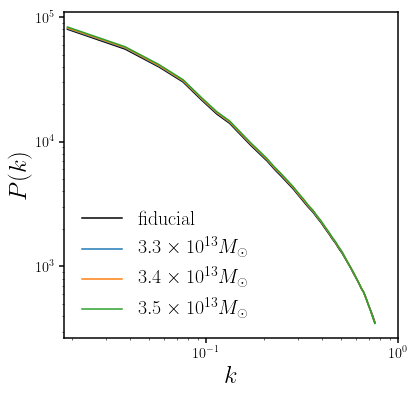

In [7]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.plot(kf * bk_fid[0], bk_fid[3], c='k', label=r'fiducial')
sub.plot(kf * bk_m_p[0], bk_m_p[3], c='C0', label=r'$3.3\times10^{13}M_\odot$')
sub.plot(kf * bk_m_pp[0], bk_m_pp[3], c='C1', label=r'$3.4\times10^{13}M_\odot$')
sub.plot(kf * bk_m_ppp[0], bk_m_ppp[3], c='C2', label=r'$3.5\times10^{13}M_\odot$')
sub.legend(loc='lower left', fontsize=20)
sub.set_xlabel('$k$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(1.8e-2, 1e0)
sub.set_ylabel('$P(k)$', fontsize=25)
sub.set_yscale('log')

(0.95, 1.1)

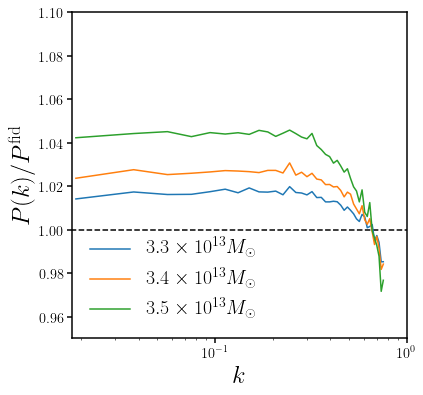

In [11]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.plot(kf * bk_m_p[0], bk_m_p[3]/bk_fid[3], c='C0', label=r'$3.3\times10^{13}M_\odot$')
sub.plot(kf * bk_m_pp[0], bk_m_pp[3]/bk_fid[3], c='C1', label=r'$3.4\times10^{13}M_\odot$')
sub.plot(kf * bk_m_ppp[0], bk_m_ppp[3]/bk_fid[3], c='C2', label=r'$3.5\times10^{13}M_\odot$')
sub.plot([1e-2, 1e0], [1., 1.], c='k', ls='--', zorder=0)
sub.legend(loc='lower left', fontsize=20)
sub.set_xlabel('$k$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(1.8e-2, 1e0)
sub.set_ylabel(r'$P(k)/P^{\rm fid}$', fontsize=25)
sub.set_ylim(0.95, 1.1)

In [12]:
ijl = UT.ijl_order(bk_fid[0], bk_fid[1], bk_fid[2])

(1000000.0, 10000000000.0)

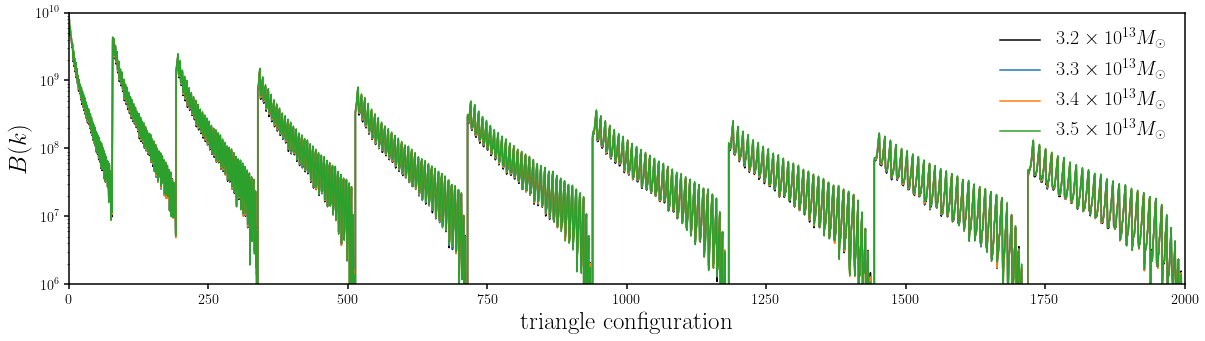

In [13]:
fig = plt.figure(figsize=(20,5))
sub = fig.add_subplot(111)
sub.plot(range(len(bk_fid[0])), bk_fid[6][ijl], c='k', label=r'$3.2\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_p[6][ijl], c='C0', label=r'$3.3\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_pp[6][ijl], c='C1', label=r'$3.4\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_ppp[6][ijl], c='C2', label=r'$3.5\times10^{13}M_\odot$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xlim(0., 2000.)
sub.set_ylabel('$B(k)$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e6, 1e10)

(0.9, 1.15)

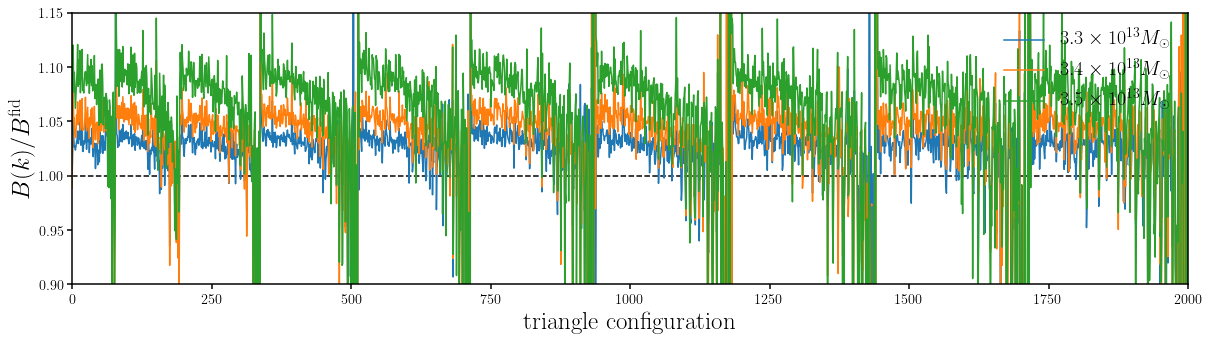

In [16]:
fig = plt.figure(figsize=(20,5))
sub = fig.add_subplot(111)
sub.plot(range(len(bk_fid[0])), bk_m_p[6][ijl]/bk_fid[6][ijl], c='C0', label=r'$3.3\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_pp[6][ijl]/bk_fid[6][ijl], c='C1', label=r'$3.4\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_ppp[6][ijl]/bk_fid[6][ijl], c='C2', label=r'$3.5\times10^{13}M_\odot$')
sub.plot([0., len(bk_fid[0])], [1., 1.], c='k', ls='--', zorder=0)
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xlim(0., 2000.)
sub.set_ylabel(r'$B(k)/B^{\rm fid}$', fontsize=25)
sub.set_ylim(0.9, 1.15)

How does this compare to the effect of $M_\nu$ --- __keeping other parameters fixed__? 

In [17]:
def quijoteBk_Mnu(tt): 
    fbk = os.path.join(UT.dat_dir(), 'bispectrum', 'quijote_%s.hdf5' % tt)
    bks = h5py.File(fbk, 'r')
    _bks = {}
    for k in bks.keys(): 
        _bks[k] = bks[k].value
    return _bks

In [18]:
qbk_fid = quijoteBk_Mnu('fiducial')
qbk_mnu_p = quijoteBk_Mnu('Mnu_p')
qbk_mnu_pp = quijoteBk_Mnu('Mnu_pp')
qbk_mnu_ppp = quijoteBk_Mnu('Mnu_ppp')

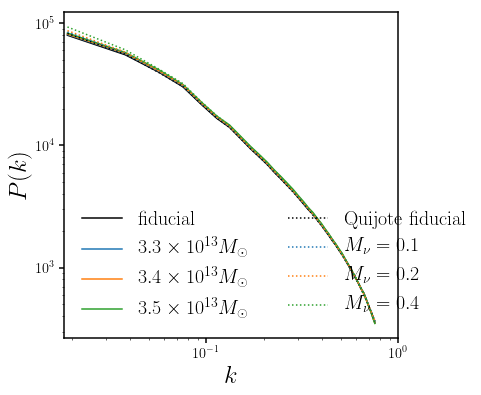

In [22]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.plot(kf * bk_fid[0], bk_fid[3], c='k', label=r'fiducial')
sub.plot(kf * bk_m_p[0], bk_m_p[3], c='C0', label=r'$3.3\times10^{13}M_\odot$')
sub.plot(kf * bk_m_pp[0], bk_m_pp[3], c='C1', label=r'$3.4\times10^{13}M_\odot$')
sub.plot(kf * bk_m_ppp[0], bk_m_ppp[3], c='C2', label=r'$3.5\times10^{13}M_\odot$')

sub.plot(kf * qbk_fid['k1'], np.average(qbk_fid['p0k1'], axis=0), c='k', ls=':', label=r'Quijote fiducial')
sub.plot(kf * qbk_fid['k1'], np.average(qbk_mnu_p['p0k1'], axis=0), c='C0', ls=':', label=r'$M_\nu = 0.1$')
sub.plot(kf * qbk_fid['k1'], np.average(qbk_mnu_pp['p0k1'], axis=0), c='C1', ls=':', label=r'$M_\nu = 0.2$')
sub.plot(kf * qbk_fid['k1'], np.average(qbk_mnu_ppp['p0k1'], axis=0), c='C2', ls=':', label=r'$M_\nu = 0.4$')
sub.legend(loc='lower left', ncol=2, fontsize=20)
sub.set_xlabel('$k$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(1.8e-2, 1e0)
sub.set_ylabel('$P(k)$', fontsize=25)
sub.set_yscale('log')

(0.95, 1.1)

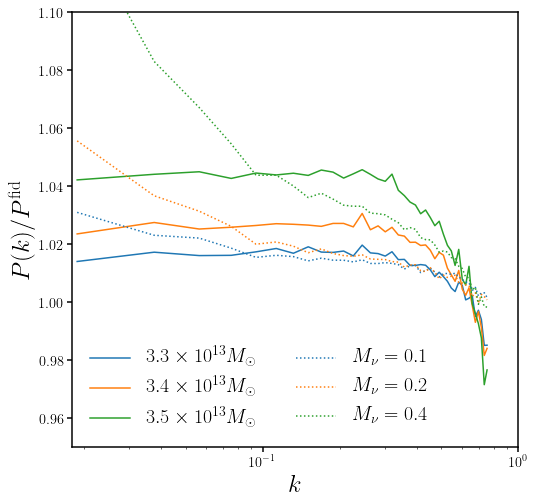

In [24]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.plot(kf * bk_m_p[0], bk_m_p[3]/bk_fid[3], c='C0', label=r'$3.3\times10^{13}M_\odot$')
sub.plot(kf * bk_m_pp[0], bk_m_pp[3]/bk_fid[3], c='C1', label=r'$3.4\times10^{13}M_\odot$')
sub.plot(kf * bk_m_ppp[0], bk_m_ppp[3]/bk_fid[3], c='C2', label=r'$3.5\times10^{13}M_\odot$')

sub.plot(kf * qbk_fid['k1'], np.average(qbk_mnu_p['p0k1'], axis=0)/np.average(qbk_fid['p0k1'], axis=0), c='C0', ls=':', label=r'$M_\nu = 0.1$')
sub.plot(kf * qbk_fid['k1'], np.average(qbk_mnu_pp['p0k1'], axis=0)/np.average(qbk_fid['p0k1'], axis=0), c='C1', ls=':', label=r'$M_\nu = 0.2$')
sub.plot(kf * qbk_fid['k1'], np.average(qbk_mnu_ppp['p0k1'], axis=0)/np.average(qbk_fid['p0k1'], axis=0), c='C2', ls=':', label=r'$M_\nu = 0.4$')
sub.legend(loc='lower left', ncol=2, fontsize=20)
sub.set_xlabel('$k$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(1.8e-2, 1e0)
sub.set_ylabel(r'$P(k)/P^{\rm fid}$', fontsize=25)
sub.set_ylim(0.95, 1.1)

(1000000.0, 10000000000.0)

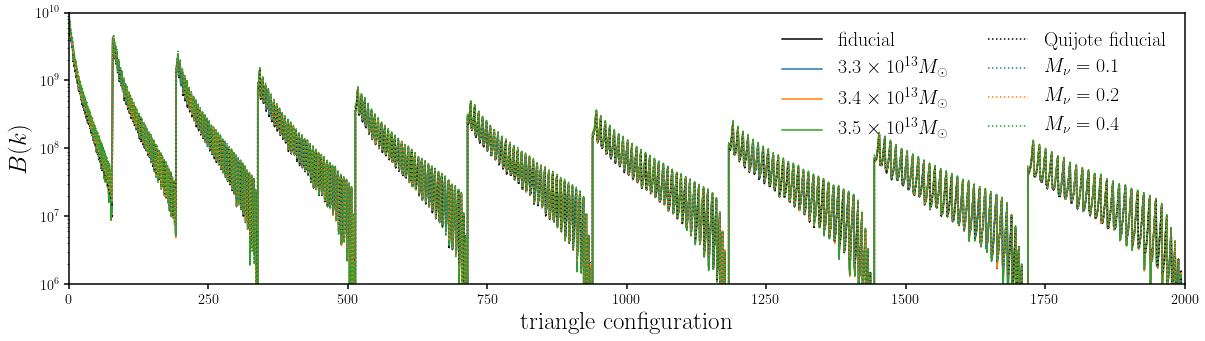

In [25]:
fig = plt.figure(figsize=(20,5))
sub = fig.add_subplot(111)
sub.plot(range(len(bk_fid[0])), bk_fid[6][ijl], c='k', label=r'fiducial')
sub.plot(range(len(bk_fid[0])), bk_m_p[6][ijl], c='C0', label=r'$3.3\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_pp[6][ijl], c='C1', label=r'$3.4\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_ppp[6][ijl], c='C2', label=r'$3.5\times10^{13}M_\odot$')

sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_fid['b123'], axis=0)[ijl], c='k', ls=':', label=r'Quijote fiducial')
sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_p['b123'], axis=0)[ijl], c='C0', ls=':', label=r'$M_\nu = 0.1$')
sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_pp['b123'], axis=0)[ijl], c='C1', ls=':', label=r'$M_\nu = 0.2$')
sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_ppp['b123'], axis=0)[ijl], c='C2', ls=':', label=r'$M_\nu = 0.4$')
sub.legend(loc='upper right', ncol=2, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xlim(0., 2000.)
sub.set_ylabel('$B(k)$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e6, 1e10)

(0.95, 1.2)

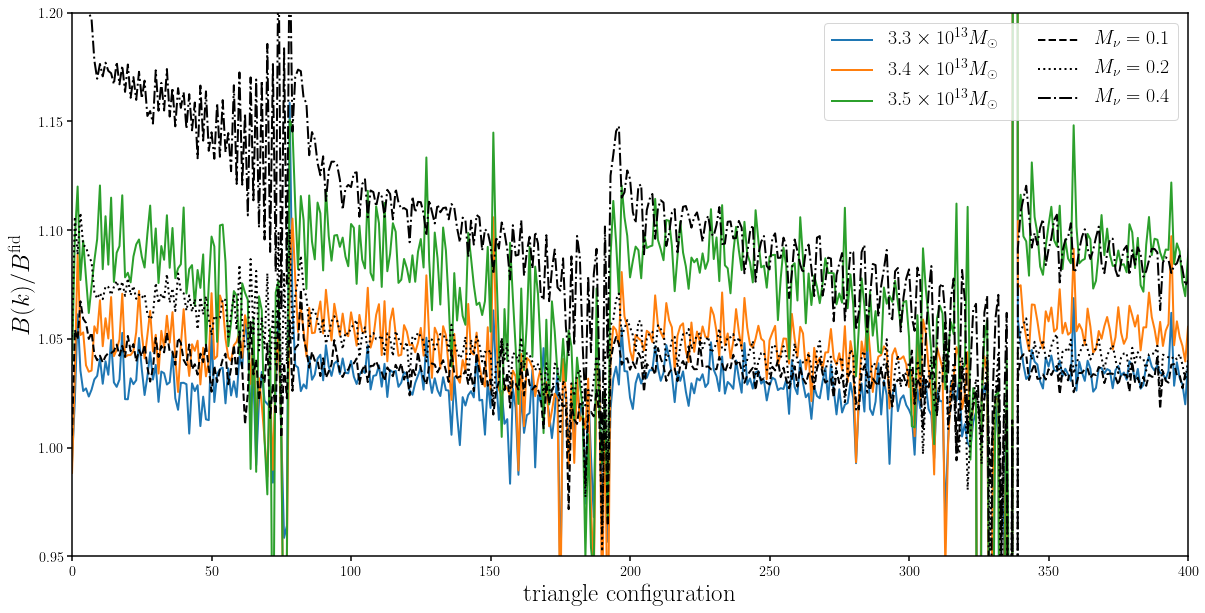

In [41]:
fig = plt.figure(figsize=(20,10))
sub = fig.add_subplot(111)
sub.plot(range(len(bk_fid[0])), bk_m_p[6][ijl]/bk_fid[6][ijl], c='C0', lw=2, label=r'$3.3\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_pp[6][ijl]/bk_fid[6][ijl], c='C1', lw=2, label=r'$3.4\times10^{13}M_\odot$')
sub.plot(range(len(bk_fid[0])), bk_m_ppp[6][ijl]/bk_fid[6][ijl], c='C2', lw=2, label=r'$3.5\times10^{13}M_\odot$')

sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_p['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], 
         c='k', ls='--', lw=2, label=r'$M_\nu = 0.1$')
sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_pp['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], 
         c='k', ls=':', lw=2, label=r'$M_\nu = 0.2$')
sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_ppp['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], 
         c='k', ls='-.', lw=2, label=r'$M_\nu = 0.4$')
sub.legend(loc='upper right', ncol=2, frameon=True, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xlim(0., 400.)
sub.set_ylabel(r'$B(k)/B^{\rm fid}$', fontsize=25)
sub.set_ylim(0.95, 1.2)

(0.95, 1.2)

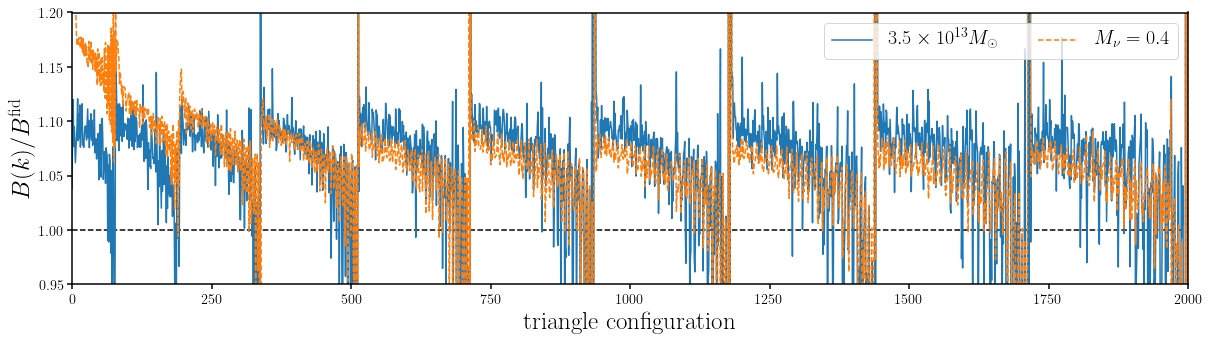

In [35]:
fig = plt.figure(figsize=(20,5))
sub = fig.add_subplot(111)
sub.plot(range(len(bk_fid[0])), bk_m_ppp[6][ijl]/bk_fid[6][ijl], c='C0', label=r'$3.5\times10^{13}M_\odot$')
#sub.plot(range(len(bk_fid[0])), bk_m_pp[6][ijl]/bk_fid[6][ijl], c='C1', lw=0.5, label=r'$4.\times10^{13}M_\odot$')
#sub.plot(range(len(bk_fid[0])), bk_m_ppp[6][ijl]/bk_fid[6][ijl], c='C2', lw=0.5, label=r'$4.4\times10^{13}M_\odot$')

#sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_p['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], c='k', lw=0.25)
#sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_p['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], c='C0', ls=':', label=r'$M_\nu = 0.1$')

#sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_pp['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], c='k', lw=0.25)
#sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_pp['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], c='C1', ls=':', label=r'$M_\nu = 0.2$')

sub.plot(range(len(qbk_fid['k1'])), np.average(qbk_mnu_ppp['b123'], axis=0)[ijl]/np.average(qbk_fid['b123'], axis=0)[ijl], c='C1', ls='--', label=r'$M_\nu = 0.4$')
sub.plot([0., 2000.], [1.0, 1.0], c='k', ls='--', zorder=1)
sub.legend(loc='upper right', ncol=2, frameon=True, fontsize=20)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xlim(0., 2000.)
sub.set_xlabel('triangle configuration', fontsize=25)
sub.set_xlim(0., 2000.)
sub.set_ylabel(r'$B(k)/B^{\rm fid}$', fontsize=25)
sub.set_ylim(0.95, 1.2)